# Data Analysis: Audible dating of stylistically similar music from differing decades

In [189]:
import numpy, pandas, scipy, matplotlib, seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt

## Preparation

In [ ]:
rawData = pandas.read_csv('PlinkStudyParsedData.csv', index_col=0)

analysisData = rawData.copy()
analysisData.head()

In [191]:
songInformation = pandas.read_csv('SongInformation.csv', index_col=0)
songInformation.head()

,ReleaseYear,NewOld,StyleGroup
SongNames,,,
BlueOrchid,2005,New,HardRock
GoldOnTheCeiling,2010,New,HardRock
GoodTimesBadTimes,1969,Old,HardRock
Bitch,1971,Old,HardRock
SaveYourTears,2020,New,SynthPop


### Delete all datapoints with recognition level 2 

In [ ]:
songNameKeys = ['BlueOrchid', 'GoldOnTheCeiling',
       'GoodTimesBadTimes','Bitch',
       'SaveYourTears', '87Stingray',
       'ThatWasYesterday', 'CryWolf',
       'Touch', 'TakeBackTheNight',
       'YouShouldBeDancing', 'Fantasy',
       'TearsDryOnTheirOwn', 'TroubleSleeping',
       'HoneyLove', 'ICantSeeMyselfLeavingYou']

songRecognitionKeys = ['BORecognition', 'GOTCRecognition',
                    'GTBTRecognition', 'BRecognition',
                    'SYTRecognition', '87SRecognition',
                    'TWYRecognition', 'CWRecognition',
                    'TRecognition', 'TBTNRecognition',
                    'YSBDRecognition', 'FRecognition',
                    'TDOTORecognition', 'TSRecognition',
                    'HLRecognition', 'ICSMLYRecognition']

for index, row in analysisData.iterrows():
       for keyIndex, key in enumerate(songRecognitionKeys):
              if (row[key] == 2):
                     analysisData.at[index, songNameKeys[keyIndex]] = None

analysisData.head()

In [193]:
subsetSongsYears = analysisData[['BlueOrchid', 'GoldOnTheCeiling',
       'GoodTimesBadTimes','Bitch',
       'SaveYourTears', '87Stingray',
       'ThatWasYesterday', 'CryWolf',
       'Touch', 'TakeBackTheNight',
       'YouShouldBeDancing', 'Fantasy',
       'TearsDryOnTheirOwn', 'TroubleSleeping',
       'HoneyLove', 'ICantSeeMyselfLeavingYou']]

In [194]:
subsetSongsYearsSwapped = subsetSongsYears.swapaxes('index', 'columns')
subsetSongsYearsSwapped

runID,10,12,14,15,17,2,28,30,33,37,39
BlueOrchid,2001.0,1973.0,1995.0,1982.0,1986.0,2005.0,1990.0,1991.0,1984.0,1973.0,1981.0
GoldOnTheCeiling,2000.0,2002.0,1975.0,1993.0,1992.0,1976.0,1986.0,2010.0,1983.0,1995.0,1997.0
GoodTimesBadTimes,1997.0,1985.0,1994.0,2001.0,1968.0,2013.0,2005.0,1987.0,2009.0,2014.0,2017.0
Bitch,1974.0,1968.0,1975.0,NaN,1989.0,1967.0,2001.0,2006.0,1983.0,1988.0,1976.0
SaveYourTears,2011.0,2014.0,1982.0,2008.0,1992.0,2006.0,2011.0,1998.0,2016.0,2004.0,1986.0
87Stingray,1987.0,2013.0,2015.0,2014.0,1998.0,2019.0,1977.0,1997.0,2017.0,1994.0,2010.0
ThatWasYesterday,1982.0,2009.0,2005.0,NaN,1979.0,2010.0,1973.0,2018.0,1986.0,2005.0,2011.0
CryWolf,1982.0,1993.0,1995.0,1985.0,1995.0,1986.0,1994.0,2001.0,1991.0,2009.0,1987.0
Touch,1971.0,1964.0,NaN,1992.0,1972.0,2015.0,1968.0,1988.0,1968.0,2006.0,1991.0
TakeBackTheNight,1982.0,2019.0,1980.0,1978.0,1973.0,2012.0,1985.0,2010.0,1977.0,2011.0,2007.0


In [195]:
dataSongsComplete = pandas.concat([songInformation, subsetSongsYearsSwapped], axis=1)
dataSongsComplete

,ReleaseYear,NewOld,StyleGroup,10,12,14,15,17,2,28,30,33,37,39
BlueOrchid,2005,New,HardRock,2001.0,1973.0,1995.0,1982.0,1986.0,2005.0,1990.0,1991.0,1984.0,1973.0,1981.0
GoldOnTheCeiling,2010,New,HardRock,2000.0,2002.0,1975.0,1993.0,1992.0,1976.0,1986.0,2010.0,1983.0,1995.0,1997.0
GoodTimesBadTimes,1969,Old,HardRock,1997.0,1985.0,1994.0,2001.0,1968.0,2013.0,2005.0,1987.0,2009.0,2014.0,2017.0
Bitch,1971,Old,HardRock,1974.0,1968.0,1975.0,NaN,1989.0,1967.0,2001.0,2006.0,1983.0,1988.0,1976.0
SaveYourTears,2020,New,SynthPop,2011.0,2014.0,1982.0,2008.0,1992.0,2006.0,2011.0,1998.0,2016.0,2004.0,1986.0
87Stingray,2021,New,SynthPop,1987.0,2013.0,2015.0,2014.0,1998.0,2019.0,1977.0,1997.0,2017.0,1994.0,2010.0
ThatWasYesterday,1985,Old,SynthPop,1982.0,2009.0,2005.0,NaN,1979.0,2010.0,1973.0,2018.0,1986.0,2005.0,2011.0
CryWolf,1987,Old,SynthPop,1982.0,1993.0,1995.0,1985.0,1995.0,1986.0,1994.0,2001.0,1991.0,2009.0,1987.0
Touch,2016,New,Disco,1971.0,1964.0,NaN,1992.0,1972.0,2015.0,1968.0,1988.0,1968.0,2006.0,1991.0
TakeBackTheNight,2013,New,Disco,1982.0,2019.0,1980.0,1978.0,1973.0,2012.0,1985.0,2010.0,1977.0,2011.0,2007.0


## Statistical Analysis

## Generate Means

In [196]:
dataSongsComplete['Mean']= dataSongsComplete[[10,12,14,15,17,2,28,30,33,37,39]].mean(axis=1)
dataSongsComplete

,ReleaseYear,NewOld,StyleGroup,10,12,14,15,17,2,28,30,33,37,39,Mean
BlueOrchid,2005,New,HardRock,2001.0,1973.0,1995.0,1982.0,1986.0,2005.0,1990.0,1991.0,1984.0,1973.0,1981.0,1987.363636
GoldOnTheCeiling,2010,New,HardRock,2000.0,2002.0,1975.0,1993.0,1992.0,1976.0,1986.0,2010.0,1983.0,1995.0,1997.0,1991.727273
GoodTimesBadTimes,1969,Old,HardRock,1997.0,1985.0,1994.0,2001.0,1968.0,2013.0,2005.0,1987.0,2009.0,2014.0,2017.0,1999.090909
Bitch,1971,Old,HardRock,1974.0,1968.0,1975.0,NaN,1989.0,1967.0,2001.0,2006.0,1983.0,1988.0,1976.0,1982.700000
SaveYourTears,2020,New,SynthPop,2011.0,2014.0,1982.0,2008.0,1992.0,2006.0,2011.0,1998.0,2016.0,2004.0,1986.0,2002.545455
87Stingray,2021,New,SynthPop,1987.0,2013.0,2015.0,2014.0,1998.0,2019.0,1977.0,1997.0,2017.0,1994.0,2010.0,2003.727273
ThatWasYesterday,1985,Old,SynthPop,1982.0,2009.0,2005.0,NaN,1979.0,2010.0,1973.0,2018.0,1986.0,2005.0,2011.0,1997.800000
CryWolf,1987,Old,SynthPop,1982.0,1993.0,1995.0,1985.0,1995.0,1986.0,1994.0,2001.0,1991.0,2009.0,1987.0,1992.545455
Touch,2016,New,Disco,1971.0,1964.0,NaN,1992.0,1972.0,2015.0,1968.0,1988.0,1968.0,2006.0,1991.0,1983.500000
TakeBackTheNight,2013,New,Disco,1982.0,2019.0,1980.0,1978.0,1973.0,2012.0,1985.0,2010.0,1977.0,2011.0,2007.0,1994.000000


### Linear Regression JudgedReleaseYear ~ ActualReleaseYear 

c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


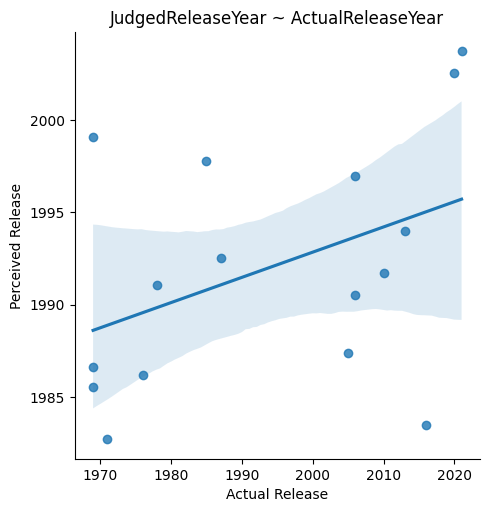

In [197]:
regpl = seaborn.lmplot(data=dataSongsComplete, x='ReleaseYear', y="Mean")
regpl.set(xlabel='Actual Release', ylabel='Perceived Release', title='JudgedReleaseYear ~ ActualReleaseYear')
plt.show()


In [198]:
CorRelYear = smf.ols('Mean ~ ReleaseYear', data=dataSongsComplete).fit()
CorRelYear.summary()

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.940
Date:                Thu, 31 Aug 2023   Prob (F-statistic):              0.108
Time:                        22:05:48   Log-Likelihood:                -50.807
No. Observations:                  16   AIC:                             105.6
Df Residuals:                      14   BIC:                             107.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1719.3635    159.012     10.813      0.000    1378.316    2060.411
ReleaseYear     0.1367      0.080      1.715      0.108      -0.034       0.308
==============================================================================
Omnibus:                        0.095   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.314
Skew:                           0.085   Prob(JB):                        0.855
Kurtosis:                       2.336   Cond. No.                     2.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Compare performance for new songs with old songs

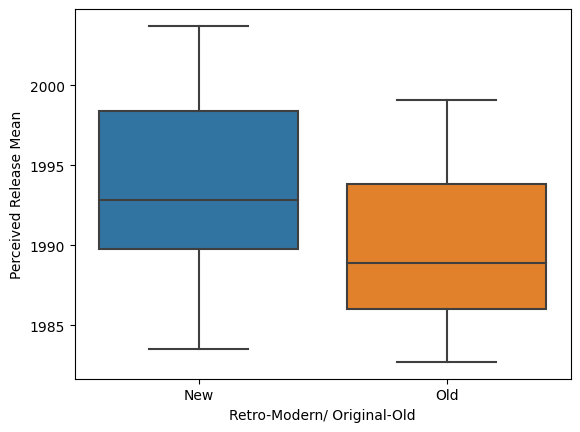

In [223]:
perf = seaborn.boxplot(x='NewOld', y="Mean", data=dataSongsComplete)
perf.set(xlabel='Retro-Modern/ Original-Old', ylabel='Perceived Release Mean')
plt.show()

In [200]:
groupNew = dataSongsComplete.loc[dataSongsComplete['NewOld'] == "New"]
groupOld = dataSongsComplete.loc[dataSongsComplete['NewOld'] == "Old"]

In [201]:
stats.shapiro(groupNew['Mean'])

ShapiroResult(statistic=0.9630448222160339, pvalue=0.8385554552078247)

In [202]:
stats.shapiro(groupOld['Mean'])

ShapiroResult(statistic=0.9197574257850647, pvalue=0.4278983473777771)

In [203]:
stats.ttest_rel(groupOld['Mean'], groupNew['Mean'])

Ttest_relResult(statistic=-1.3299759506406679, pvalue=0.2252230896245887)

In [204]:
scipy.mean(groupOld['Mean'])


C:\Users\Till\AppData\Local\Temp\ipykernel_14644\867878309.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(groupOld['Mean'])


1990.1988636363635

In [205]:
scipy.mean(groupNew['Mean'])

C:\Users\Till\AppData\Local\Temp\ipykernel_14644\3407099730.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(groupNew['Mean'])


1993.8011363636363

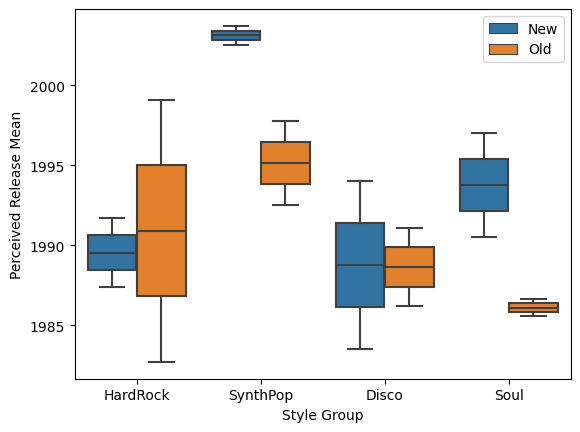

In [222]:
perf = seaborn.boxplot(x='StyleGroup', y="Mean", hue='NewOld', data=dataSongsComplete, )
perf.set(xlabel='Style Group', ylabel='Perceived Release Mean')
plt.legend()
plt.show()